<a href="https://colab.research.google.com/github/endzix22/machine-learning-bootcamp/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

sns.set(font_scale=1.3)
np.random.seed(42)

Załadowanie danych

In [33]:
from sklearn.datasets import load_iris

raw_data=load_iris()
all_data=raw_data.copy()

data=all_data['data']
target=all_data['target']
feature_names=all_data['feature_names']
target_names=all_data['target_names']

In [34]:
#teraz na podstawie tych danych zbudujemy obiekt DF 
df=pd.DataFrame(data=np.c_[data,target],columns=feature_names+['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Pracujemy tutaj tylko na targecie i dwoch kolumnach..
Natomiast nizej działamy na całym zbiorze+ dzielimy go na zbior treningowy i testowy

In [35]:
#wytniemy sobie tylko kolumny sepal_length,sepal_width 
data=data[:,[0,1]]

target=df['target'].apply(int).values

print(f'{data[:5]}\n')
print(f'{target[:5]}')


[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

[0 0 0 0 0]


LAS LOSOWY

In [36]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=42)

classifier.fit(data, target)

RandomForestClassifier(random_state=42)

In [37]:
classifier.score(data,target)
#dokladnosc naszego modelu 

0.9266666666666666

In [38]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



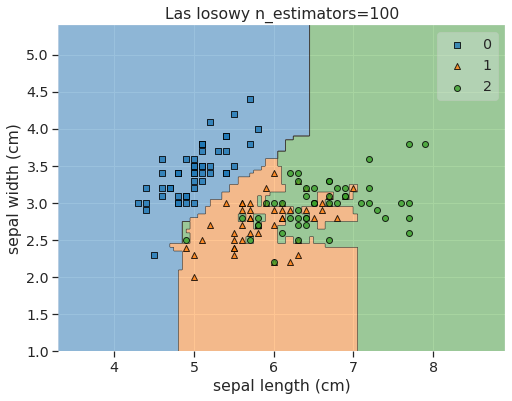

In [39]:
plt.figure(figsize=(8,6))
plot_decision_regions(data,target,classifier)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Las losowy n_estimators=100')
plt.show()
#wyswietlenie granic decyzyjnych modelu 
#n_estimators=100 to wartosc domyslna (100 drzew decyzyjnych)i potem glosem wiekszosci przewidujemy klase

Wszystkie cechy z podzieleniem na zbior treningowy i testowy

(wyzej był utworzony model tylko z wybranymi kolumnami)

In [40]:
data=all_data['data']
targets=all_data['target']

In [41]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(data,targets)

print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train)
print('y_test shape ',y_test.shape)

X_train shape:  (112, 4)
X_test shape:  (38, 4)
y_train shape:  [0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1
 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2
 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1
 2]
y_test shape  (38,)


In [42]:
classifier=RandomForestClassifier(n_estimators=100,random_state=42)
classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [43]:
#sprawdzmy jak model dziala na dancyh testowych
from sklearn.metrics import accuracy_score 

y_pred=classifier.predict(X_test)

accuracy_score(y_test,y_pred)

1.0

In [44]:
classifier.feature_importances_
#MOZEMY SPRAWDZIC, KTORE Z CECH RZECZYWISCIE MIALY WPLYW NA DZIALANIE NASZEGO MODELU

array([0.10968334, 0.02954459, 0.43763486, 0.42313721])

In [45]:
features = pd.DataFrame(data={'feature': feature_names, 'feature_importance': classifier.feature_importances_})

px.bar(features, x='feature', y='feature_importance', width=700, height=400)